In [1]:
import pandas as pd

# pre-procesado

In [ ]:
li = []
path = "data/de_Valdecilla/report6_"
all_files = [path+"2016-2017.csv",
             path+"2017-2018.csv",
             path+"2018-2019.csv",
             path+"2019-2020.csv",
             path+"2020-2021.csv",
            ]

for filename in all_files:
    df = pd.read_csv(filename)
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
data = data.drop_duplicates()

In [ ]:
data["ActivityDateTime"] = pd.to_datetime(data["ActivityDateTime"])

In [ ]:
data = data.sort_values(by = "ActivityDateTime")

In [ ]:
# data.to_csv("data/Activities.csv", index=False)

# Exploración y análisis

In [2]:
data = pd.read_csv("data/Activities.csv")

In [3]:
data["ActivityDateTime"] = pd.to_datetime(data["ActivityDateTime"])

In [4]:
print(data.shape)
data.head()

(196025, 7)


,ActivityDateTime,ctrActivitySer,ctrActivityInstanceSer,ctrScheduledActivitySer,ctrPatientSer,ActivityCategory,WaitTime
0,2016-01-06 07:30:00,227,199,175,4,Examen,201
1,2016-01-06 10:45:00,243,1532,1480,232,Tratamiento,-
2,2016-01-06 11:30:00,243,1654,1602,235,Tratamiento,-
3,2016-01-06 12:00:00,243,2171,2119,52,Tratamiento,-
4,2016-01-06 12:15:00,243,1770,1718,239,Tratamiento,-


In [5]:
data["ActivityCategory"].value_counts()

Tratamiento                           107302
Tareas de planificación                25371
Flujo de trabajo                       12133
Dosimetria                              9526
Simulación                              8764
Registro                                6944
Paciente en descanso                    4567
Mantenimiento                           3230
Diagnóstico                             3061
Braquiterapia                           3002
Tareas de los oncólogos                 2874
Examen                                  2813
Control del tratamiento                 2230
QA                                      2022
Actividades de revisión especiales       823
Oncothermia                              359
Presimulación                            295
Decisiones                               268
Tareas de simulación                     237
RIO                                       71
ICT                                       49
Incidencias                               21
Reunión de

In [6]:
data["ctrPatientSer"].value_counts()

0       10040
755       968
754       837
814       233
5206      170
        ...  
1004        1
367         1
499         1
1916        1
3350        1
Name: ctrPatientSer, Length: 6710, dtype: int64

D:\miniconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
D:\miniconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


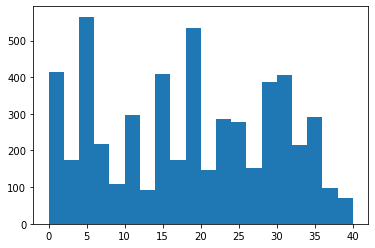

In [7]:
import matplotlib.pyplot as plt
import numpy as np

tratamientos = data[data["ActivityCategory"]=="Tratamiento"][data["ctrPatientSer"]!=755][data["ctrPatientSer"]!=0]
ntrat = tratamientos["ctrPatientSer"].value_counts()
# print(ntrat)
# np.mean(ntrat)
# np.sum(ntrat)

# histograma del número de sesiones de tratamiento recibidas por paciente
plt.hist(ntrat, bins=20, range=[0,40])
plt.show()

In [8]:
print(tratamientos.shape)
tratamientos.head()

(101836, 7)


,ActivityDateTime,ctrActivitySer,ctrActivityInstanceSer,ctrScheduledActivitySer,ctrPatientSer,ActivityCategory,WaitTime
1,2016-01-06 10:45:00,243,1532,1480,232,Tratamiento,-
2,2016-01-06 11:30:00,243,1654,1602,235,Tratamiento,-
3,2016-01-06 12:00:00,243,2171,2119,52,Tratamiento,-
4,2016-01-06 12:15:00,243,1770,1718,239,Tratamiento,-
6,2016-01-06 15:00:00,243,3573,3521,243,Tratamiento,-


In [9]:
print(tratamientos.iloc[:,1].unique().shape)
print(tratamientos.iloc[:,2].unique().shape)
print(tratamientos.iloc[:,3].unique().shape)
print(tratamientos.iloc[:,4].unique().shape)

(18,)
(101836,)
(101795,)
(5428,)


In [18]:
tratamientos["ctrPatientSer"].unique()

array([ 232,  235,   52, ..., 6268, 6785, 6639], dtype=int64)

In [32]:
tratamientos["ctrScheduledActivitySer"].value_counts()

45       2
59       2
53       2
70       2
21       2
        ..
939      1
5033     1
7080     1
25511    1
2047     1
Name: ctrScheduledActivitySer, Length: 101795, dtype: int64

In [34]:
# tratamientos[tratamientos["ctrPatientSer"]==232]["ctrPatientSer"].unique()
tratamientos[tratamientos["ctrScheduledActivitySer"]==59]

,ActivityDateTime,ctrActivitySer,ctrActivityInstanceSer,ctrScheduledActivitySer,ctrPatientSer,ActivityCategory,WaitTime
2171,2016-05-17 11:15:00,242,84,59,27,Tratamiento,234
86641,2018-10-04 12:19:59,243,10118,59,170,Tratamiento,0
